# 8. Hough transform – line and circle detection


In [23]:
import cv2
import math

from matplotlib import pyplot as plt

def show_image(image, title="", cmap=""):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap="gray", vmin=0)
    plt.axis('off')
    plt.show()

### **b)** Use `HoughLines()` to detect lines in images like those in figure 1.a and 1.b; try different parameter values; draw the detected lines on the image. 


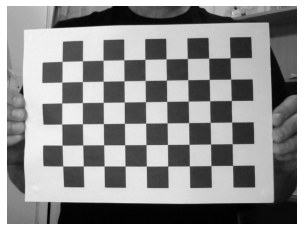

In [24]:
image = cv2.imread("Images/chessboard_03.jpg", 0)

show_image(image)

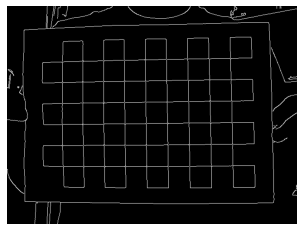

In [25]:
canny = cv2.Canny(image, 50, 200)

show_image(canny)

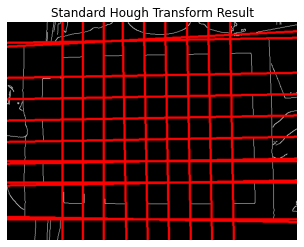

In [28]:
distance_resolution = 1
angle_resolution = np.pi / 180
min_num_votes = 150

lines = cv2.HoughLines(canny, distance_resolution, angle_resolution, min_num_votes, None, 0, 0)
copy = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)

# Drawing the lines
def draw_lines(copy):
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(copy, pt1, pt2, (255, 0, 0), 3)

draw_lines(copy)

show_image(copy, title="Standard Hough Transform Result")

### **c)** Use `HoughLinesP()` to detect line segments in the same images that you used in the previous problem; try different parameter values; draw the detected line segments on the image.